Number of partitions: 4


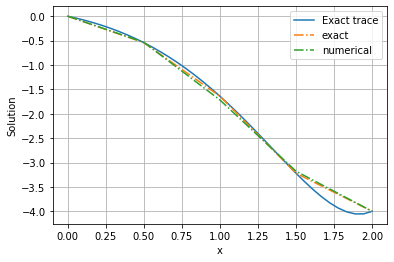

Number of partitions: 8


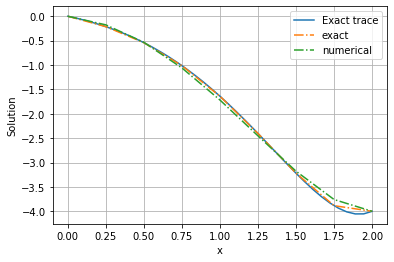

Number of partitions: 12


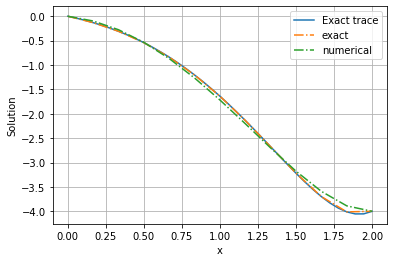

Number of partitions: 16


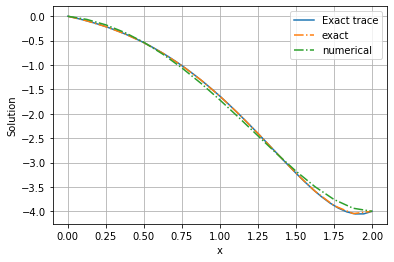

Number of partitions: 20


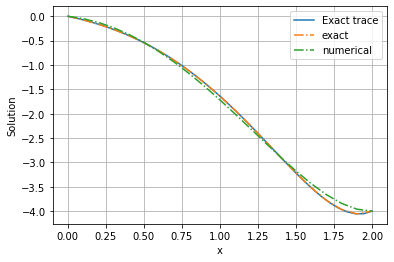

Number of partitions: 24


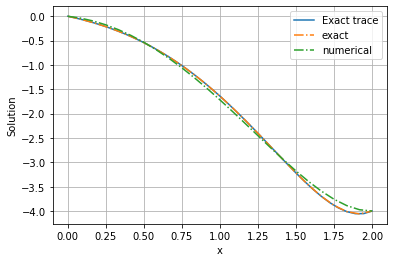

Number of partitions: 28


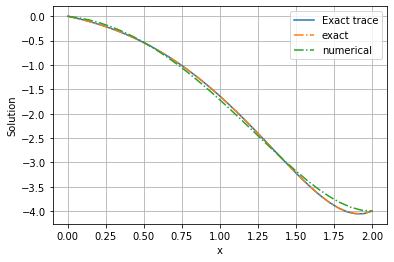

Number of partitions: 32


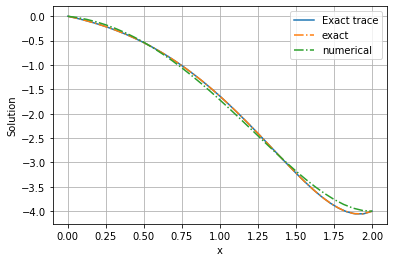

Number of partitions: 36


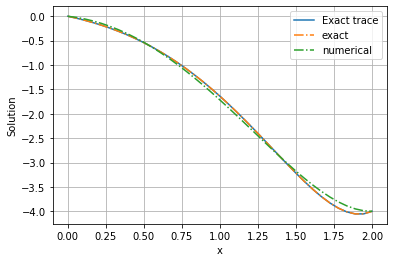

+----+---------------------+------------------------+----------------------+
| N  |      Step size      |          LCE           |        Error         |
+----+---------------------+------------------------+----------------------+
| 4  |         0.5         |  0.007025842301476404  |  0.3742990657613283  |
| 8  |         0.25        |  0.006387266953524984  | 0.34033709904071624  |
| 12 | 0.16666666666666666 |  0.00449171867135667   |  0.2394562353425096  |
| 16 |        0.125        | 0.0030944086934532322  |  0.1650262616716442  |
| 20 |         0.1         | 0.0020954926048615263  | 0.11178337485265807  |
| 24 | 0.08333333333333333 | 0.0013588729456350812  | 0.07250288242832495  |
| 28 | 0.07142857142857142 | 0.0007969217975329901  | 0.04252626474854804  |
| 32 |        0.0625       | 0.00035543673589444325 | 0.018969461632958186 |
+----+---------------------+------------------------+----------------------+


<Figure size 432x288 with 0 Axes>

In [ ]:
 #this is a simple ODE solver for the 1D Poisson Equation using finite elements

import sys
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from prettytable import PrettyTable

myTable = PrettyTable(["N", "Step size", "LCE", "Error"])
sol =[] 
percentages =[]
#fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

def get_quadrature(rule):

    coords = []
    weights = []
    
    if rule == 2:
        coords = [-0.57735026918962576451, 0.57735026918962576451]
        weights = [1.0000000000000000, 1.0000000000000000]
    elif rule == 3:
        coords = [-0.7745966692414837704, 0.0000000000000000000, 0.7745966692414837704]
        weights = [0.5555555555555556, 0.8888888888888888, 0.5555555555555556]
    elif rule == 4:
        coords = [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
        weights = [0.3478548451374538, 0.6521451548625461, 0.6521451548625461, 0.3478548451374538]
    elif rule == 5:
        coords = [-0.9061798459386640, -0.5384693101056831, 0.0000000000000000, 0.5384693101056831, 0.9061798459386640]
        weights = [0.2369268850561891, 0.4786286704993665, 0.5688888888888889, 0.4786286704993665, 0.2369268850561891]
    elif rule == 6:
        coords = [-0.9324695142031521, -0.6612093864662645, -0.2386191860831969, 0.2386191860831969, 0.6612093864662645, 0.9324695142031521]
        weights = [0.1713244923791704, 0.3607615730481386, 0.4679139345726910, 0.4679139345726910, 0.3607615730481386, 0.1713244923791704]
    elif rule == 7:
        coords = [-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0000000000000000, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585]
        weights = [0.1294849661688697, 0.2797053914892766, 0.3818300505051189, 0.4179591836734694, 0.3818300505051189, 0.2797053914892766, 0.1294849661688697]
    elif rule == 8:
        coords = [-0.9602898564975363, -0.7966664774136267, -0.5255324099163290, -0.1834346424956498, 0.1834346424956498, 0.5255324099163290, 0.7966664774136267, 0.9602898564975363]
        weights = [0.1012285362903763, 0.2223810344533745, 0.3137066458778873, 0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 0.2223810344533745, 0.1012285362903763]
    else:
      assert(False)
    
    return [coords,weights]

def compute_integral(coords,weights,x_a,x_b,func,mult):
    n = len(coords)
    hx = 0.5*(x_b-x_a)
    cx = 0.5*(x_b+x_a)
    res = 0.0
    for i in range(n):
        x = cx + coords[i]*hx
        res += weights[i] * func(x) * mult
    return res

def get_quadrature(rule):

    coords = []
    weights = []
    
    if rule == 2:
        coords = [-0.57735026918962576451, 0.57735026918962576451]
        weights = [1.0000000000000000, 1.0000000000000000]
    elif rule == 3:
        coords = [-0.7745966692414837704, 0.0000000000000000000, 0.7745966692414837704]
        weights = [0.5555555555555556, 0.8888888888888888, 0.5555555555555556]
    elif rule == 4:
        coords = [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
        weights = [0.3478548451374538, 0.6521451548625461, 0.6521451548625461, 0.3478548451374538]
    elif rule == 5:
        coords = [-0.9061798459386640, -0.5384693101056831, 0.0000000000000000, 0.5384693101056831, 0.9061798459386640]
        weights = [0.2369268850561891, 0.4786286704993665, 0.5688888888888889, 0.4786286704993665, 0.2369268850561891]
    elif rule == 6:
        coords = [-0.9324695142031521, -0.6612093864662645, -0.2386191860831969, 0.2386191860831969, 0.6612093864662645, 0.9324695142031521]
        weights = [0.1713244923791704, 0.3607615730481386, 0.4679139345726910, 0.4679139345726910, 0.3607615730481386, 0.1713244923791704]
    elif rule == 7:
        coords = [-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0000000000000000, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585]
        weights = [0.1294849661688697, 0.2797053914892766, 0.3818300505051189, 0.4179591836734694, 0.3818300505051189, 0.2797053914892766, 0.1294849661688697]
    elif rule == 8:
        coords = [-0.9602898564975363, -0.7966664774136267, -0.5255324099163290, -0.1834346424956498, 0.1834346424956498, 0.5255324099163290, 0.7966664774136267, 0.9602898564975363]
        weights = [0.1012285362903763, 0.2223810344533745, 0.3137066458778873, 0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 0.2223810344533745, 0.1012285362903763]
    else:
      assert(False)
    
    return [coords,weights]

def compute_integral(coords,weights,x_a,x_b,func,mult):
    n = len(coords)
    hx = 0.5*(x_b-x_a)
    cx = 0.5*(x_b+x_a)
    res = 0.0
    for i in range(n):
        x = cx + coords[i]*hx
        res += weights[i] * func(x) * mult
    return res

def phi1(x,xl,xr):
    h = xr - xl
    return 1.0 - (1.0/h)*(x - xl)

def phi1_x(x,xl,xr):
    h = xr - xl
    return - (1.0/h)

def phi2(x,xl,xr):
    h = xr - xl
    return (1.0/h)*(x - xl)

def phi2_x(x,xl,xr):
    h = xr - xl
    return (1.0/h)

# the function that sets up and run the problem
def solve(N, ode_f, a, b, u_a, u_b):

    # uniform step size
    h = (b - a)/N
    # get the x's in the discretization of interval (a,b)
    x = np.linspace(a, b, N+1)
    # need the element to node connectivity
    elems = np.zeros((N,2))
    for i in range(N):
      elems[i,0] = i
      elems[i,1] = i+1

    # build the linear system
    # system matrix
    A = np.matrix(np.zeros((N+1,N+1)))
    # system RHS vector
    f = np.array(np.zeros((N+1,1)))

    # populate A and f
    # loop over elements and assemble A
    for e in range(N):
      xl = x[int(elems[e,0])]
      xr = x[int(elems[e,1])]
      quad = get_quadrature(4)
      # entry 11
      func = lambda xin : - phi1_x(xin,xl,xr)*phi1_x(xin,xl,xr)
      A[int(elems[e,0]),int(elems[e,0])] += compute_integral(quad[0],quad[1],
                                                  xl,xr,func,1.0)  
      # entry 22
      func = lambda xin : - phi2_x(xin,xl,xr)*phi2_x(xin,xl,xr)
      A[int(elems[e,1]),int(elems[e,1])] += compute_integral(quad[0],quad[1],
                                                  xl,xr,func,1.0)  
      # entries 12 & 21
      func = lambda xin : - phi1_x(xin,xl,xr)*phi2_x(xin,xl,xr)
      val =compute_integral(quad[0],quad[1],xl,xr,func,1.0)
      A[int(elems[e,0]),int(elems[e,1])] += val
      A[int(elems[e,1]),int(elems[e,0])] += val
      
    # loop over elements and assemble f
    for e in range(N):
      xl = x[int(elems[e,0])]
      xr = x[int(elems[e,1])]
      quad = get_quadrature(4)
      func0 = lambda xin : ode_f(xin) * phi1(xin,xl,xr)
      #f[int(elems[e,0])] += integrate.quad(func0,xl,xr)
      f[int(elems[e,0])] += compute_integral(quad[0],quad[1],
                                                  xl,xr,func0,1.0)
      func1 = lambda xin : ode_f(xin) * phi2(xin,xl,xr)
      #f[int(elems[e,1])] += integrate.quad(func1,xl,xr)
      f[int(elems[e,1])] += compute_integral(quad[0],quad[1],
                                                   xl,xr,func1,1.0)

    # enforce BC
    # diagonal entry in row 0 has one, rest are 0
    A[0,0] = 1.0
    A[0,1] = 0.0
    # diagonal entry in row N has one, rest are 0
    A[N,N] = 1.0
    A[N,N-1] = 0.0
    # change first and last entry on RHS to be boundary values
    f[0] = u_a
    f[N] = u_b
    # solve the linear system
    u = np.linalg.solve(A,f)
    # return the solution and mesh points for plotting
    return [x, u]

N_val = []
#if __name__ == '__main__':

# domain (a,b)
a = 0.0
b = 2
# boundary values
u_a = 0.0
u_b = -4

    
# some test vals
# get number of partitions for terminal input
x_N_1 = []
U_N_1 = []
U_e_1 = []
list_h=[]
for i in range(4,40, 4) :
  N = i
  N_val.append(N)
  
  # RHS function in ODE
  ode_f = lambda xi : xi*np.exp(xi)-xi-3
  u_e = lambda xin : (xin**3/6-5*xin/3+2)*np.exp(xin)-xin-2

  # solve the problem and plot the solution
  output_N = solve(N,ode_f,a,b,u_a,u_b)
  list_h.append((b-a)/N)
  x_N = output_N[0]
  x_N_1.append(x_N)
  U_N = output_N[1]
  U_N_1.append(U_N)
  U_e = u_e(x_N)
  U_e_1.append(U_e)
  # plot the final solution
 
  #print("X_N",x_N)
  
# print(len(x_N))
# print(len(U_N))
# print(len(x))
# print(len(sol))



#x = np.linspace(a, b, 10000)
for N in N_val:
  x = np.linspace(a, b, N + 1)
for g in x:
    u_exact =  (g**3/6-5*g/3+2)*np.exp(g)-g-2
    sol.append(u_exact)

for i in range(0,len(N_val)):
  #print("N:",N_val[i])
  X_sum = sum(x_N_1[i])
  Ex_sol = sum(sol)/len(sol)
  Num_sol = sum(U_e_1[i])/len(U_e_1[i])

  Ex_sol2 = sum(sol)
  Num_sol2 = sum(U_e_1[i])
#  print("xn:",x_N_1)
  # print("sol",sol)
  # print("ue:",U_e_1)
  #Error = np.abs(Ex_sol-Num_sol)/N *100
  if i != len(N_val)-1:
    LCE = (Ex_sol-Num_sol)
    #GCE = Ex_sol2-Num_sol2
    Error = (Ex_sol-Num_sol)/((Ex_sol+Num_sol)/2)*100
    myTable.add_row([N_val[i], list_h[i], LCE, np.abs(Error)])
  #percentages.append(Error)
  #Printing table
 
  # Ex_sol=0
  # Num_sol=0
  # X_sum=0
  #print(U)
  print("Number of partitions:", N_val[i])
  plt.plot(x, sol, label='Exact trace')
  plt.plot(x_N_1[i], U_e_1[i], label='exact', linestyle='dashdot') 
  plt.plot(x_N_1[i], U_N_1[i], label='numerical',  linestyle='dashdot')
  plt.xlabel("x")
  plt.ylabel("Solution")
  plt.legend()
  plt.grid()
  plt.show()
print(myTable)
plt.savefig("1.png")

Nunmber of partitions: 4


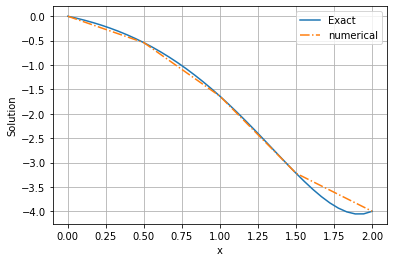

Nunmber of partitions: 8


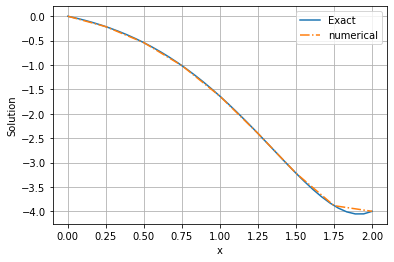

Nunmber of partitions: 12


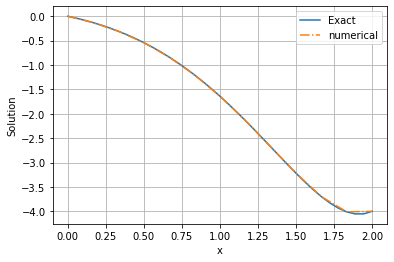

Nunmber of partitions: 16


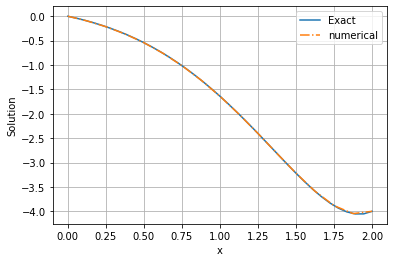

Nunmber of partitions: 20


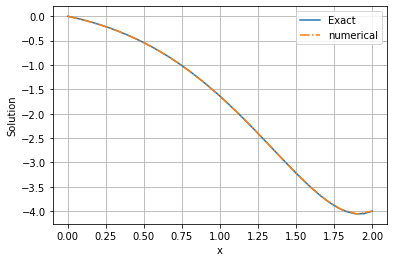

Nunmber of partitions: 24


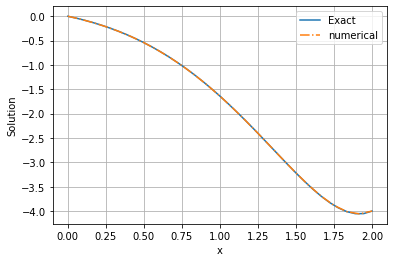

Nunmber of partitions: 28


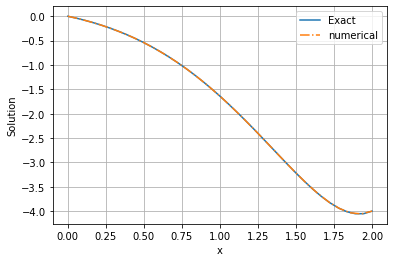

Nunmber of partitions: 32


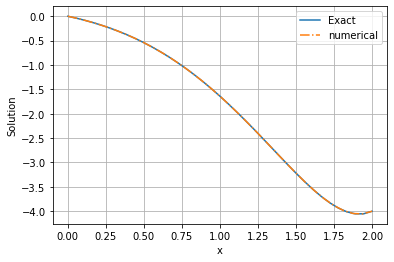

Nunmber of partitions: 36


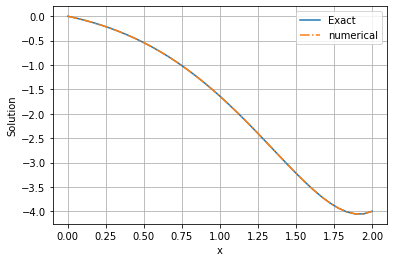

+----+---------------------+------------------------+-------+
| N  |      Step size      |          LTE           | Error |
+----+---------------------+------------------------+-------+
| 4  |         0.5         |  0.007025842301476404  |  0.37 |
| 8  |         0.25        |  0.006387266953524984  |  0.34 |
| 12 | 0.16666666666666666 |  0.00449171867135667   |  0.24 |
| 16 |        0.125        | 0.0030944086934532322  |  0.17 |
| 20 |         0.1         | 0.0020954926048615263  |  0.11 |
| 24 | 0.08333333333333333 | 0.0013588729456350812  |  0.07 |
| 28 | 0.07142857142857142 | 0.0007969217975329901  |  0.04 |
| 32 |        0.0625       | 0.00035543673589444325 |  0.02 |
+----+---------------------+------------------------+-------+


In [1]:
 #this is a simple ODE solver for the 1D Poisson Equation using finite elements

import sys
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from prettytable import PrettyTable

myTable = PrettyTable(["N", "Step size", "LTE",  "Error"])
sol =[] 
percentages =[]
#fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

def get_quadrature(rule):

    coords = []
    weights = []
    
    if rule == 2:
        coords = [-0.57735026918962576451, 0.57735026918962576451]
        weights = [1.0000000000000000, 1.0000000000000000]
    elif rule == 3:
        coords = [-0.7745966692414837704, 0.0000000000000000000, 0.7745966692414837704]
        weights = [0.5555555555555556, 0.8888888888888888, 0.5555555555555556]
    elif rule == 4:
        coords = [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
        weights = [0.3478548451374538, 0.6521451548625461, 0.6521451548625461, 0.3478548451374538]
    elif rule == 5:
        coords = [-0.9061798459386640, -0.5384693101056831, 0.0000000000000000, 0.5384693101056831, 0.9061798459386640]
        weights = [0.2369268850561891, 0.4786286704993665, 0.5688888888888889, 0.4786286704993665, 0.2369268850561891]
    elif rule == 6:
        coords = [-0.9324695142031521, -0.6612093864662645, -0.2386191860831969, 0.2386191860831969, 0.6612093864662645, 0.9324695142031521]
        weights = [0.1713244923791704, 0.3607615730481386, 0.4679139345726910, 0.4679139345726910, 0.3607615730481386, 0.1713244923791704]
    elif rule == 7:
        coords = [-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0000000000000000, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585]
        weights = [0.1294849661688697, 0.2797053914892766, 0.3818300505051189, 0.4179591836734694, 0.3818300505051189, 0.2797053914892766, 0.1294849661688697]
    elif rule == 8:
        coords = [-0.9602898564975363, -0.7966664774136267, -0.5255324099163290, -0.1834346424956498, 0.1834346424956498, 0.5255324099163290, 0.7966664774136267, 0.9602898564975363]
        weights = [0.1012285362903763, 0.2223810344533745, 0.3137066458778873, 0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 0.2223810344533745, 0.1012285362903763]
    else:
      assert(False)
    
    return [coords,weights]

def compute_integral(coords,weights,x_a,x_b,func,mult):
    n = len(coords)
    hx = 0.5*(x_b-x_a)
    cx = 0.5*(x_b+x_a)
    res = 0.0
    for i in range(n):
        x = cx + coords[i]*hx
        res += weights[i] * func(x) * mult
    return res

def get_quadrature(rule):

    coords = []
    weights = []
    
    if rule == 2:
        coords = [-0.57735026918962576451, 0.57735026918962576451]
        weights = [1.0000000000000000, 1.0000000000000000]
    elif rule == 3:
        coords = [-0.7745966692414837704, 0.0000000000000000000, 0.7745966692414837704]
        weights = [0.5555555555555556, 0.8888888888888888, 0.5555555555555556]
    elif rule == 4:
        coords = [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
        weights = [0.3478548451374538, 0.6521451548625461, 0.6521451548625461, 0.3478548451374538]
    elif rule == 5:
        coords = [-0.9061798459386640, -0.5384693101056831, 0.0000000000000000, 0.5384693101056831, 0.9061798459386640]
        weights = [0.2369268850561891, 0.4786286704993665, 0.5688888888888889, 0.4786286704993665, 0.2369268850561891]
    elif rule == 6:
        coords = [-0.9324695142031521, -0.6612093864662645, -0.2386191860831969, 0.2386191860831969, 0.6612093864662645, 0.9324695142031521]
        weights = [0.1713244923791704, 0.3607615730481386, 0.4679139345726910, 0.4679139345726910, 0.3607615730481386, 0.1713244923791704]
    elif rule == 7:
        coords = [-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0000000000000000, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585]
        weights = [0.1294849661688697, 0.2797053914892766, 0.3818300505051189, 0.4179591836734694, 0.3818300505051189, 0.2797053914892766, 0.1294849661688697]
    elif rule == 8:
        coords = [-0.9602898564975363, -0.7966664774136267, -0.5255324099163290, -0.1834346424956498, 0.1834346424956498, 0.5255324099163290, 0.7966664774136267, 0.9602898564975363]
        weights = [0.1012285362903763, 0.2223810344533745, 0.3137066458778873, 0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 0.2223810344533745, 0.1012285362903763]
    else:
      assert(False)
    
    return [coords,weights]

def compute_integral(coords,weights,x_a,x_b,func,mult):
    n = len(coords)
    hx = 0.5*(x_b-x_a)
    cx = 0.5*(x_b+x_a)
    res = 0.0
    for i in range(n):
        x = cx + coords[i]*hx
        res += weights[i] * func(x) * mult
    return res

def phi1(x,xl,xr):
    h = xr - xl
    return 1.0 - (1.0/h)*(x - xl)

def phi1_x(x,xl,xr):
    h = xr - xl
    return - (1.0/h)

def phi2(x,xl,xr):
    h = xr - xl
    return (1.0/h)*(x - xl)

def phi2_x(x,xl,xr):
    h = xr - xl
    return (1.0/h)

# the function that sets up and run the problem
def solve(N, ode_f, a, b, u_a, u_b):

    # uniform step size
    h = (b - a)/N
    # get the x's in the discretization of interval (a,b)
    x = np.linspace(a, b, N+1)
    # need the element to node connectivity
    elems = np.zeros((N,2))
    for i in range(N):
      elems[i,0] = i
      elems[i,1] = i+1

    # build the linear system
    # system matrix
    A = np.matrix(np.zeros((N+1,N+1)))
    # system RHS vector
    f = np.array(np.zeros((N+1,1)))

    # populate A and f
    # loop over elements and assemble A
    for e in range(N):
      xl = x[int(elems[e,0])]
      xr = x[int(elems[e,1])]
      quad = get_quadrature(4)
      # entry 11
      func = lambda xin : - phi1_x(xin,xl,xr)*phi1_x(xin,xl,xr)
      A[int(elems[e,0]),int(elems[e,0])] += compute_integral(quad[0],quad[1],
                                                  xl,xr,func,1.0)  
      # entry 22
      func = lambda xin : - phi2_x(xin,xl,xr)*phi2_x(xin,xl,xr)
      A[int(elems[e,1]),int(elems[e,1])] += compute_integral(quad[0],quad[1],
                                                  xl,xr,func,1.0)  
      # entries 12 & 21
      func = lambda xin : - phi1_x(xin,xl,xr)*phi2_x(xin,xl,xr)
      val =compute_integral(quad[0],quad[1],xl,xr,func,1.0)
      A[int(elems[e,0]),int(elems[e,1])] += val
      A[int(elems[e,1]),int(elems[e,0])] += val
      
    # loop over elements and assemble f
    for e in range(N):
      xl = x[int(elems[e,0])]
      xr = x[int(elems[e,1])]
      quad = get_quadrature(4)
      func0 = lambda xin : ode_f(xin) * phi1(xin,xl,xr)
      #f[int(elems[e,0])] += integrate.quad(func0,xl,xr)
      f[int(elems[e,0])] += compute_integral(quad[0],quad[1],
                                                  xl,xr,func0,1.0)
      func1 = lambda xin : ode_f(xin) * phi2(xin,xl,xr)
      #f[int(elems[e,1])] += integrate.quad(func1,xl,xr)
      f[int(elems[e,1])] += compute_integral(quad[0],quad[1],
                                                   xl,xr,func1,1.0)

    # enforce BC
    # diagonal entry in row 0 has one, rest are 0
    A[0,0] = 1.0
    A[0,1] = 0.0
    # diagonal entry in row N has one, rest are 0
    A[N,N] = 1.0
    A[N,N-1] = 0.0
    # change first and last entry on RHS to be boundary values
    f[0] = u_a
    f[N] = u_b
    # solve the linear system
    u = np.linalg.solve(A,f)
    # return the solution and mesh points for plotting
    return [x, u]

N_val = []
#if __name__ == '__main__':

# domain (a,b)
a = 0.0
b = 2
# boundary values
u_a = 0.0
u_b = -4

    
# some test vals
# get number of partitions for terminal input
x_N_1 = []
U_N_1 = []
U_e_1 = []
list_h=[]
for i in range(4,40,4) :
  N = i
  N_val.append(N)
  
  # RHS function in ODE
  ode_f = lambda xi : xi*np.exp(xi)-xi-3
  u_e = lambda xin : (xin**3/6-5*xin/3+2)*np.exp(xin)-xin-2

  # solve the problem and plot the solution
  output_N = solve(N,ode_f,a,b,u_a,u_b)
  list_h.append((b-a)/N)
  x_N = output_N[0]
  x_N_1.append(x_N)
  U_N = output_N[1]
  U_N_1.append(U_N)
  U_e = u_e(x_N)
  U_e_1.append(U_e)
  # plot the final solution
 
  #print("X_N",x_N)
  
# print(len(x_N))
# print(len(U_N))
# print(len(x))
# print(len(sol))



#x = np.linspace(a, b, 100)
for N in N_val:
  x = np.linspace(a, b, N + 1)
for g in x:
    u_exact =  (g**3/6-5*g/3+2)*np.exp(g)-g-2
    sol.append(u_exact)

for i in range(0,len(N_val)):
  print("Nunmber of partitions:",N_val[i])
  X_sum = sum(x_N_1[i])
  Ex_sol = sum(sol)/len(sol)
  Num_sol = sum(U_e_1[i])/len(U_e_1[i])
#  print("xn:",x_N_1)
  # print("sol",sol)
  # print("ue:",U_e_1)
  #Error = np.abs(Ex_sol-Num_sol)/N *100
  if i != len(N_val)-1:
    Diff = np.abs(Ex_sol-Num_sol)
    #Diff2 = np.abs(sum(sol)-sum(U_e_1[i]))
    Error = np.abs(Ex_sol-Num_sol)/((Ex_sol+Num_sol)/2)*100
    myTable.add_row([N_val[i], list_h[i], Diff, np.abs(round(Error,2))])
  #percentages.append(Error)
  #Printing table
 
  # Ex_sol=0
  # Num_sol=0
  # X_sum=0
  #print(U)
  plt.plot(x, sol, label='Exact')
  plt.plot(x_N_1[i], U_e_1[i], label='numerical', linestyle='dashdot') 
  #plt.plot(x_N_1[i], U_N_1[i], label='numerical',  linestyle='dashdot')
  plt.xlabel("x")
  plt.ylabel("Solution")
  plt.legend()
  plt.grid()
  plt.show()
print(myTable)